In [159]:
import pandas as pd

import pickle
import numpy as np

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import glob
import re
from sklearn.preprocessing import quantile_transform, MinMaxScaler

from scipy.stats import spearmanr, pearsonr
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.linear_model import LinearRegression

In [3]:
pd.options.display.max_columns = 50

In [4]:
def quantileNormalize(df_input):
    df = df_input.copy()
    #compute rank
    dic = {}
    for col in df:
        dic.update({col : sorted(df[col])})
    sorted_df = pd.DataFrame(dic)
    rank = sorted_df.mean(axis = 1).tolist()
    #sort
    for col in df:
        t = np.searchsorted(np.sort(df[col]), df[col])
        df[col] = [rank[i] for i in t]
    return df

# convert P06 protein

In [16]:
df = pd.read_csv("../data/protein/FromDiffacto_E0022_P06_log_transformed.tsv", sep='\t')

df = df.drop(['N.Pept', 'Q.Pept', 'S/N', 'P(PECA)'], axis=1).set_index('Protein').T

df.to_csv("../data/protein/E0022_P06_log_transformed.tsv", sep='\t')

In [ ]:
df = pd.read_csv("../data/protein/FromDiffacto_E0022_P06_log_transformed.tsv", sep='\t')


## median normalisation

In [54]:
df = pd.read_csv("../data/protein/FromDiffacto_E0022_P06_log_transformed.tsv", sep='\t')

df = df.drop(['N.Pept', 'Q.Pept', 'S/N', 'P(PECA)'], axis=1).set_index('Protein').T

In [55]:
df_median_norm = df.apply(lambda row:row-np.nanmedian(row), axis=1)

In [56]:
df.head()

Protein,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,1433S_HUMAN,1433T_HUMAN,1433Z_HUMAN,1A03_HUMAN,1A24_HUMAN,2A5D_HUMAN,...,ZO2_HUMAN,ZPR1_HUMAN,ZRAB2_HUMAN,ZW10_HUMAN,ZYX_HUMAN,sp|P49327|FAS_HUMAN,sp|P78527|PRKDC_HUMAN,sp|Q00610|CLH1_HUMAN,sp|Q13813|SPTN1_HUMAN,sp|Q14204|DYHC1_HUMAN
180329_e0022_p01_2051_1_s_m06_1,1.366712,-0.379017,0.145958,0.020725,0.706700,0.215300,1.194450,NaN,NaN,-0.029726,...,0.839440,-0.446742,-0.593657,0.636341,0.026846,0.769756,0.430933,0.569526,1.575045,0.611558
180329_e0022_p01_2051_2_s_m06_1,1.216321,-0.165864,0.026386,0.141515,0.772427,0.369221,1.224733,NaN,NaN,-0.153385,...,0.846809,-0.456315,-0.532285,0.473204,0.074372,0.739575,0.420686,0.644488,1.519512,0.639871
180329_e0022_p01_2051_3_s_m06_1,1.512553,-0.094112,0.338224,-0.231715,0.392807,0.341544,1.033066,NaN,NaN,0.600706,...,0.523833,-0.643200,-0.791797,0.921086,-0.208231,1.061711,0.750340,0.916700,1.419850,0.745835
180329_e0022_p01_2098_1_s_m06_1,1.182712,1.336629,1.067884,0.462023,0.118597,1.471258,1.191380,NaN,1.787231,0.753880,...,0.582013,0.653656,-0.253880,0.604116,0.907799,1.974982,0.863071,1.461805,1.100506,1.767590
180329_e0022_p01_2098_2_s_m06_1,0.760195,0.959274,0.667517,0.555434,-0.284466,1.053615,0.580849,NaN,0.472755,0.162919,...,0.620631,0.532498,-0.205474,0.415667,0.656514,1.251139,0.040918,0.749182,0.840511,1.411439


In [57]:
df_median_norm.head()

Protein,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,1433S_HUMAN,1433T_HUMAN,1433Z_HUMAN,1A03_HUMAN,1A24_HUMAN,2A5D_HUMAN,...,ZO2_HUMAN,ZPR1_HUMAN,ZRAB2_HUMAN,ZW10_HUMAN,ZYX_HUMAN,sp|P49327|FAS_HUMAN,sp|P78527|PRKDC_HUMAN,sp|Q00610|CLH1_HUMAN,sp|Q13813|SPTN1_HUMAN,sp|Q14204|DYHC1_HUMAN
180329_e0022_p01_2051_1_s_m06_1,1.092588,-0.653141,-0.128165,-0.253398,0.432576,-0.058823,0.920327,NaN,NaN,-0.303849,...,0.565317,-0.720865,-0.867780,0.362218,-0.247277,0.495633,0.156809,0.295403,1.300921,0.337435
180329_e0022_p01_2051_2_s_m06_1,0.984866,-0.397319,-0.205069,-0.089941,0.540971,0.137765,0.993278,NaN,NaN,-0.384840,...,0.615354,-0.687771,-0.763740,0.241748,-0.157083,0.508119,0.189231,0.413032,1.288057,0.408416
180329_e0022_p01_2051_3_s_m06_1,1.284942,-0.321723,0.110612,-0.459327,0.165195,0.113933,0.805455,NaN,NaN,0.373094,...,0.296222,-0.870812,-1.019409,0.693474,-0.435843,0.834100,0.522728,0.689089,1.192239,0.518223
180329_e0022_p01_2098_1_s_m06_1,0.620413,0.774329,0.505584,-0.100277,-0.443702,0.908958,0.629080,NaN,1.224931,0.191581,...,0.019714,0.091357,-0.816180,0.041816,0.345500,1.412682,0.300771,0.899505,0.538206,1.205291
180329_e0022_p01_2098_2_s_m06_1,0.508181,0.707260,0.415503,0.303420,-0.536480,0.801601,0.328835,NaN,0.220741,-0.089095,...,0.368617,0.280484,-0.457489,0.163653,0.404500,0.999125,-0.211096,0.497168,0.588497,1.159425


In [60]:
df_median_norm.to_csv("../data/protein/E0022_P06_log_transformed_median.tsv", sep='\t')

## quantile normalisation

In [ ]:
df = pd.read_csv("../data/protein/FromDiffacto_E0022_P06_log_transformed.tsv", sep='\t')

df = df.drop(['N.Pept', 'Q.Pept', 'S/N', 'P(PECA)'], axis=1).set_index('Protein').T

In [17]:
df_quant_norm = pd.DataFrame(quantile_transform(df), columns=df.columns, index=df.index)

/Users/scai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2553: FutureWarning: The default value of `copy` will change from False to True in 0.23 in order to make it more consistent with the default `copy` values of other functions in :mod:`sklearn.preprocessing.data` and prevent unexpected side effects by modifying the value of `X` inplace. To avoid inplace modifications of `X`, it is recommended to explicitly set `copy=True`
  FutureWarning)


In [5]:
df_quant_norm.values[np.isnan(df)] = np.nan

In [18]:
df_quant_norm.head()

Protein,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,1433S_HUMAN,1433T_HUMAN,1433Z_HUMAN,1A03_HUMAN,1A24_HUMAN,2A5D_HUMAN,...,ZO2_HUMAN,ZPR1_HUMAN,ZRAB2_HUMAN,ZW10_HUMAN,ZYX_HUMAN,sp|P49327|FAS_HUMAN,sp|P78527|PRKDC_HUMAN,sp|Q00610|CLH1_HUMAN,sp|Q13813|SPTN1_HUMAN,sp|Q14204|DYHC1_HUMAN
180329_e0022_p01_2051_1_s_m06_1,0.941137,0.456338,0.660549,0.519858,0.841361,0.648044,0.896659,NaN,NaN,0.474474,...,0.907599,0.460068,0.346858,0.813499,0.600664,0.776720,0.720722,0.750598,0.976999,0.755890
180329_e0022_p01_2051_2_s_m06_1,0.913877,0.535447,0.612584,0.575414,0.853123,0.703070,0.902583,NaN,NaN,0.415916,...,0.908823,0.455556,0.376730,0.758340,0.612982,0.769927,0.717877,0.781520,0.973739,0.766078
180329_e0022_p01_2051_3_s_m06_1,0.959960,0.560257,0.732291,0.413816,0.777220,0.695459,0.857543,NaN,NaN,0.769420,...,0.826275,0.373980,0.253813,0.880619,0.532856,0.826792,0.815296,0.868020,0.965383,0.802784
180329_e0022_p01_2098_1_s_m06_1,0.908055,0.886903,0.906793,0.721381,0.705692,0.938605,0.895979,NaN,0.946814,0.828328,...,0.844816,0.849546,0.515229,0.803796,0.831552,0.947884,0.845834,0.973819,0.916920,0.986593
180329_e0022_p01_2098_2_s_m06_1,0.804724,0.839597,0.829818,0.758725,0.586030,0.870713,0.709676,NaN,0.587217,0.568569,...,0.855956,0.827337,0.540467,0.739647,0.767617,0.857196,0.560527,0.818825,0.851349,0.959152


In [19]:
df_quant_norm['1433B_HUMAN'].describe()

count    7093.000000
mean        0.500001
std         0.288734
min         0.000000
25%         0.249918
50%         0.499895
75%         0.750258
max         1.000000
Name: 1433B_HUMAN, dtype: float64

In [20]:
df_quant_norm['1433E_HUMAN'].describe()

count    7135.000000
mean        0.499999
std         0.288733
min         0.000000
25%         0.250157
50%         0.500132
75%         0.750236
max         1.000000
Name: 1433E_HUMAN, dtype: float64

In [21]:
df_quant_norm.to_csv("../data/protein/E0022_P06_log_transformed_quant.tsv", sep='\t')

# convert P06 peptide

In [20]:
df = pd.read_csv("../data/protein/E0022_P06_log_transformed.csv")


In [23]:
df = df.rename(columns={'Unnamed: 0': 'Automatic_MS_filename'})

In [26]:
pickle.dump(df, open("../data/protein/E0022_P06_log_transformed_peptide.pkl", "wb"))

In [31]:
df = pickle.load(open("../data/protein/E0022_P06_log_transformed_peptide.pkl", "rb"))

In [32]:
df.shape

(7140, 36857)

In [33]:
df.head()

,Automatic_MS_filename,1433B_HUMAN=AVTEQGHELSNEER=AVTEQGHELSNEER,1433B_HUMAN=EKIEAELQDICNDVLELLDK=EKIEAELQDIC(UniMod:4)NDVLELLDK,1433B_HUMAN=IEAELQDICNDVLELLDK=IEAELQDIC(UniMod:4)NDVLELLDK,1433B_HUMAN=QTTVSNSQQAYQEAFEISK=QTTVSNSQQAYQEAFEISK,1433B_HUMAN=QTTVSNSQQAYQEAFEISKK=QTTVSNSQQAYQEAFEISKK,1433B_HUMAN=TAFDEAIAELDTLNEESYK=TAFDEAIAELDTLNEESYK,1433B_HUMAN=VISSIEQKTER=VISSIEQKTER,1433B_HUMAN=VISSIEQKTERNEK=VISSIEQKTERNEK,1433B_HUMAN=YLIPNATQPESK=YLIPNATQPESK,...,sp|Q13813|SPTN1_HUMAN=DLAALEDKVK=DLAALEDKVK,sp|Q13813|SPTN1_HUMAN=DLASVQALLR=DLASVQALLR,sp|Q13813|SPTN1_HUMAN=ELPTAFDYVEFTR=ELPTAFDYVEFTR,sp|Q13813|SPTN1_HUMAN=LGESQTLQQFSR=LGESQTLQQFSR,sp|Q13813|SPTN1_HUMAN=REELITNWEQIR=REELITNWEQIR,sp|Q13813|SPTN1_HUMAN=SLQQLAEER=SLQQLAEER,sp|Q13813|SPTN1_HUMAN=SSEEIESAFR=SSEEIESAFR,sp|Q14204|DYHC1_HUMAN=FLSDPQVHTVLVER=FLSDPQVHTVLVER,sp|Q14204|DYHC1_HUMAN=ILDDDTIITTLENLKR=ILDDDTIITTLENLKR,sp|Q14204|DYHC1_HUMAN=VTFVNFTVTR=VTFVNFTVTR
0,180329_e0022_p01_2051_1_s_m06_1,15.235416,NaN,14.343949,13.945810,12.141469,14.437037,NaN,NaN,15.680744,...,14.654972,15.632228,16.022693,15.676040,15.757781,16.014740,15.537855,13.228819,13.423772,14.089947
1,180329_e0022_p01_2051_2_s_m06_1,15.311500,NaN,14.429799,14.111951,12.183015,13.350663,10.764872,NaN,15.690053,...,14.722487,15.552819,15.943179,15.613243,15.659550,15.922584,15.511753,13.431889,13.485075,13.918118
2,180329_e0022_p01_2051_3_s_m06_1,15.143742,NaN,14.557524,14.263122,11.669771,14.712634,NaN,NaN,15.960726,...,14.075897,16.031077,15.774272,15.493230,15.583347,15.756687,15.526469,13.430453,13.606521,14.111217
3,180329_e0022_p01_2098_1_s_m06_1,15.030667,11.968667,14.040290,13.162391,12.110483,14.772830,NaN,8.924813,15.674137,...,14.195065,15.475100,15.362526,15.220832,15.199749,15.560393,15.019374,14.852139,14.529309,14.849943
4,180329_e0022_p01_2098_2_s_m06_1,14.790043,NaN,13.549424,11.716819,11.544964,14.122585,11.032046,NaN,15.239636,...,14.022975,14.938707,15.277760,14.877476,15.069869,15.388186,14.603858,14.608197,14.147920,14.411842


In [34]:
pd.isna(df).sum()

Automatic_MS_filename                                                           0
1433B_HUMAN=AVTEQGHELSNEER=AVTEQGHELSNEER                                    1038
1433B_HUMAN=EKIEAELQDICNDVLELLDK=EKIEAELQDIC(UniMod:4)NDVLELLDK              6808
1433B_HUMAN=IEAELQDICNDVLELLDK=IEAELQDIC(UniMod:4)NDVLELLDK                  4147
1433B_HUMAN=QTTVSNSQQAYQEAFEISK=QTTVSNSQQAYQEAFEISK                          2251
1433B_HUMAN=QTTVSNSQQAYQEAFEISKK=QTTVSNSQQAYQEAFEISKK                        5009
1433B_HUMAN=TAFDEAIAELDTLNEESYK=TAFDEAIAELDTLNEESYK                          3914
1433B_HUMAN=VISSIEQKTER=VISSIEQKTER                                          4678
1433B_HUMAN=VISSIEQKTERNEK=VISSIEQKTERNEK                                    5394
1433B_HUMAN=YLIPNATQPESK=YLIPNATQPESK                                         590
1433B_HUMAN=YLSEVASGDNK=YLSEVASGDNK                                           183
1433B_HUMAN=YLSEVASGDNKQTTVSNSQQAYQEAFEISK=YLSEVASGDNKQTTVSNSQQAYQEAFEISK    3540
1433E_HUMAN=AAFD

# only tissue

## use meta classifications

In [3]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map.txt", sep='\t')

In [10]:
meta.columns

Index(['Automatic_MS_filename', 'Batch', 'Code', 'Daisy_chain', 'Date',
       'Instrument', 'Replicate', 'Cell_line', 'Cancer_type', 'Tissue_type',
       'SIDM', 'growth_properties', 'MSI_status', 'methylation_data',
       'expression_data', 'cnv_data', 'crispr_ko_data', 'fusion_data',
       'drug_data', 'cancer_type_detail', 'sample_site', 'gender', 'ethnicity',
       'smoking_status', 'BROAD_ID', 'COSMIC_ID', 'CCLE_ID'],
      dtype='object')

In [21]:
cancer_type = meta[['Cell_line',
                    'Cancer_type']].drop_duplicates().reset_index(drop=True)
cancer_type_df = pd.concat([
    cancer_type.drop(['Cancer_type'], axis=1),
    pd.get_dummies(cancer_type['Cancer_type'])
],
                           axis=1)

In [25]:
cancer_type_df.to_csv("../data/cancer_type_cell_line.csv", index=False)

In [26]:
tissue_type = meta[['Cell_line',
                    'Tissue_type']].drop_duplicates().reset_index(drop=True)
tissue_type_df = pd.concat([
    tissue_type.drop(['Tissue_type'], axis=1),
    pd.get_dummies(tissue_type['Tissue_type'])
],
                           axis=1)
tissue_type_df.to_csv("../data/tissue_type_cell_line.csv", index=False)

## use IC50 classification

In [27]:
ic50 = pd.read_csv(
    "../data/drug/DrugResponse_PANCANCER_GDSC1_GDSC2_IC_20191119.csv")
ic50 = ic50.sort_values(by=['Dataset version'])
ic50 = ic50.drop_duplicates(
    ['Drug Id', 'Cell line name'], keep='last').sort_values(
        by=['Drug Id', 'Cell line name']).reset_index(drop=True)

In [35]:
ic50_tissue = ic50[['Cell line name','Tissue']].drop_duplicates().reset_index(drop=True)

In [38]:
ic50_tissue_df = pd.concat([
    ic50_tissue.drop(['Tissue'], axis=1),
    pd.get_dummies(ic50_tissue['Tissue'])
],
                           axis=1)

In [41]:
ic50_tissue_df = ic50_tissue_df.rename(columns={'Cell line name': 'Cell_line'})

In [43]:
ic50_tissue_df.to_csv("../data/tissue_ic50_cell_line.csv", index=False)

# tissue + protein

In [11]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt",
                   sep='\t')
protein = pd.read_csv(
    "../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control.txt",
    sep='\t')

In [14]:
tissue_type = meta[['Cell_line',
                    'Tissue_type']].drop_duplicates().reset_index(drop=True)
tissue_type_df = pd.concat([
    tissue_type.drop(['Tissue_type'], axis=1),
    pd.get_dummies(tissue_type['Tissue_type'])
],
                           axis=1)

In [16]:
protein_tissue = pd.merge(protein, tissue_type_df, on=['Cell_line'])

In [23]:
protein_tissue.to_csv("../data/protein_tissue/protein_tissue.tsv", index=False, sep='\t')

# select drugs for feature importance

In [278]:
drug_meta = pd.read_csv("../data/drug/drug_info.csv", low_memory=False)
scores_multi_rna = pd.read_csv(
    "../work_dirs/rna/MultiDrug/scores_202006072037_res.csv"
)
scores_multi_rna_test = scores_multi_rna[
    scores_multi_rna['run'] == 'test'].reset_index(drop=True)
scores_multi_rna_test[scores_multi_rna_test['epoch'] ==
                               210]['corr'].median()

scores_multi_protein = pd.read_csv(
    "../work_dirs/protein/MultiDrug/scores_202006060123_resx_ruv_zero_300.csv"
)
scores_multi_protein_test = scores_multi_protein[
    scores_multi_protein['run'] == 'test'].reset_index(drop=True)
scores_multi_protein_test[scores_multi_protein_test['epoch'] ==
                               70]['corr'].median()

0.5220219655937622

In [279]:
multi_res_rna = scores_multi_rna_test[scores_multi_rna_test['epoch'] == 210][[
    'drug_id', 'corr'
]]
multi_res_rna['Model'] = 'RNA+MultiDrugNN'

multi_res_protein = scores_multi_protein_test[
    scores_multi_protein_test['epoch'] == 70][['drug_id', 'corr']]
multi_res_protein['Model'] = 'Protein+MultiDrugNN'

tmp = pd.merge(multi_res_rna[['drug_id', 'corr']],
               multi_res_protein[['drug_id', 'corr']],
               on=['drug_id'],
               suffixes=['_RNA', '_protein'])

tmp.columns = ['drug_id', 'RNA_correlation', 'MultiDrug_correlation']

tmp['delta'] = tmp['MultiDrug_correlation'] - tmp['RNA_correlation']

tmp = pd.merge(drug_meta, tmp, on=['drug_id'])

In [281]:
combined = tmp

In [282]:
combined.sort_values(by=['MultiDrug_correlation'], ascending=False)

,drug_id,cell_line_name,model_synonyms,cancer_type_detail,drug_name,putative_gene_target,use_in_publications,model_type,drug_synonyms,RRID,dataset,drug_owner,BROAD_ID,target_pathway,sample_site,growth_properties,webrelease,COSMIC_ID,PUBCHEM,FDA_Approved,sensitive_count,RNA_correlation,MultiDrug_correlation,delta
435,1867,201T,NaN,Lung Adenocarcinoma,Panobinostat,HDAC1,Y,Cell Line,"LBH589, Faridak, Farydak, LBH-589, PANOBINOSTA...",CVCL_X481,GDSC2,GDSC,ACH-002089,Chromatin histone acetylation,Unknown,Unknown,N,1287381,"6918837, 23725423",Yes,493,0.716533,0.749614,0.033081
506,2018,22RV1,CWR22-Rv1;CWR22-R1,Prostate Carcinoma,PDGFR_5313,PDGFRA;PDGFRB,Y,Cell Line,"SN1062263187, PDGFR_5313",CVCL_1045,GDSC2,AZ,ACH-000956,RTK signaling,Prostate,Adherent,N,924100,NaN,NotConfirmed,60,0.710503,0.747230,0.036728
438,1909,201T,NaN,Lung Adenocarcinoma,Venetoclax,BCL2,Y,Cell Line,"ABT-199, Veneclexta, GDC-0199",CVCL_X481,GDSC2,GDSC,ACH-002089,Apoptosis regulation,Unknown,Unknown,Y,1287381,49846579,Yes,345,0.709570,0.739317,0.029747
468,1946,22RV1,CWR22-Rv1;CWR22-R1,Prostate Carcinoma,MIK-665 / S-64315,MCL1,Y,Cell Line,"SN1055540934, MCL1_Servier",CVCL_1045,GDSC2,AZ,ACH-000956,Apoptosis regulation,Prostate,Adherent,N,924100,NaN,NotConfirmed,396,0.737909,0.732891,-0.005018
640,2359,22RV1,CWR22-Rv1;CWR22-R1,Prostate Carcinoma,GSK2830371,PPM1D,Y,Cell Line,None,CVCL_1045,GDSC2,baylor.college.of.medicine.peggy.goodell,ACH-000956,Other,Prostate,Adherent,N,924100,70983932,NotConfirmed,1,0.767385,0.726658,-0.040726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,255,201T,NaN,Lung Adenocarcinoma,CP724714,ERBB2,Y,Cell Line,CP-724714,CVCL_X481,GDSC1,Nathanael.Gray,ACH-002089,RTK signaling,Unknown,Unknown,Y,1287381,9874913,NotConfirmed,31,0.286468,0.214224,-0.072243
3,6,697,Line 697;EU-3,B Acute Lymphoblastic Leukemia,PHA-665752,MET,Y,Cell Line,"PHA665752, PHA 665752",CVCL_0079,GDSC1,MGH,ACH-000070,RTK signaling,Bone marrow,Suspension,Y,906800,10461815,NotConfirmed,10,0.256390,0.203628,-0.052762
71,180,201T,NaN,Lung Adenocarcinoma,Thapsigargin,ATP2A2,Y,Cell Line,Octanoic acid,CVCL_X481,GDSC1,MGH,ACH-002089,Other,Unknown,Unknown,Y,1287381,446378,NotConfirmed,774,0.322042,0.188744,-0.133299
90,207,201T,NaN,Lung Adenocarcinoma,AS601245,MAPK8;MAPK9,Y,Cell Line,NaN,CVCL_X481,GDSC1,MGH,ACH-002089,JNK and p38 signaling,Unknown,Unknown,Y,1287381,10109823,NotConfirmed,451,0.339630,0.153889,-0.185741


In [284]:
combined[combined['drug_id'] == 1114]

,drug_id,cell_line_name,model_synonyms,cancer_type_detail,drug_name,putative_gene_target,use_in_publications,model_type,drug_synonyms,RRID,dataset,drug_owner,BROAD_ID,target_pathway,sample_site,growth_properties,webrelease,COSMIC_ID,PUBCHEM,FDA_Approved,sensitive_count,RNA_correlation,MultiDrug_correlation,delta
295,1114,22RV1,CWR22-Rv1;CWR22-R1,Prostate Carcinoma,Cetuximab,EGFR,Y,Cell Line,"Erbitux, IMC-C225, C225, IMC-225, L01XC06",CVCL_1045,GDSC1,GDSC,ACH-000956,EGFR signaling,Prostate,Adherent,Y,924100,85668777,Yes,44,0.528036,0.508472,-0.019564


In [288]:
combined[(combined['MultiDrug_correlation'] > 0.4)
         & (combined['sensitive_count'] > 20)].sort_values(
             by=['MultiDrug_correlation'])['drug_id'].shape

(435,)

In [207]:
drugs = sorted([1909, 1114, 1373, 1919, 1377, 119, 427, 1377, 1910])

In [206]:
combined[(combined['MultiDrug_correlation'] > 0.3)
         & (combined['sensitive_count'] > 0.5)].sort_values(
             by=['MultiDrug_correlation']).shape

(400, 12)

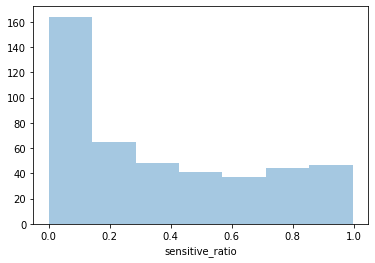

In [202]:
sns.distplot(combined['sensitive_ratio'], kde=False)

In [289]:
combined.to_csv("../data/drug/final_drug_scores.tsv", index=False, sep='\t')

# multi-omic

In [406]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt", sep='\t')
SIDM_mapping = meta[['SIDM', 'Cell_line']].drop_duplicates().set_index('SIDM').to_dict()['Cell_line']

In [441]:
mutation = pd.read_csv("../data/genomic/WES_variants.csv")
mutation = mutation[['model_id', 'Gene']].groupby(['model_id', 'Gene']).size().reset_index(name='count')

mutation_wide = pd.pivot(mutation, index='model_id', columns='Gene', values='count').fillna(0)

mutation_wide.index.name = 'Cell_line'
mutation_wide.index = mutation_wide.index.map(SIDM_mapping)
mutation_wide = mutation_wide[~pd.isna(mutation_wide.index)]
mutation_wide = mutation_wide.T
mutation_wide.index.name = 'GENE_ID'
mutation_wide[mutation_wide>1] = 1

In [415]:
cna_raw = pd.read_csv("../data/cna/copynumber_total_new_map.csv", index_col=0).T
cna_raw.index.name='SIDM'

cna_raw = cna_raw.reset_index()

cna_sample = pd.merge(cna_raw,
                      meta[['SIDM',
                            'Cell_line']].drop_duplicates()).drop(['SIDM'],
                                                                  axis=1)

cna_sample = cna_sample.set_index('Cell_line')
cna_sample = cna_sample.T

cna_sample.index.name = 'GENE_ID'

cna_sample = cna_sample.reset_index()

In [420]:
rna_raw = pd.read_csv("../data/rna/rnaseq_voom.csv", index_col=0).T

rna_raw.index.name='SIDM'

rna_raw = rna_raw.reset_index()

rna_sample = pd.merge(rna_raw,
                      meta[['SIDM',
                            'Cell_line']].drop_duplicates()).drop(['SIDM'],
                                                                  axis=1)

rna_sample = rna_sample.set_index('Cell_line')
rna_sample = rna_sample.T

rna_sample.index.name = 'GENE_ID'

# del rna_sample.columns.name
rna_sample = rna_sample.reset_index()

In [455]:
methy = pd.read_csv("../data/methylation/methy_beta_gene_promoter.csv", index_col=0).T
methy.index.name='SIDM'
methy = methy.reset_index()
methy_sample = pd.merge(methy,
                      meta[['SIDM',
                            'Cell_line']].drop_duplicates()).drop(['SIDM'],
                                                                  axis=1)

methy_sample = methy_sample.set_index('Cell_line')
methy_sample = methy_sample.T

methy_sample.index.name = 'GENE_ID'

# del methy_sample.columns.name
methy_sample = methy_sample.reset_index()

In [421]:
name_map = pd.read_csv("../data/misc/HUMAN_9606_idmapping.gene_prot.dat",
                       sep='\t',
                       names=['ID', 'type', 'code'])
name_map = name_map.drop_duplicates(['ID', 'type'])
name_map = pd.pivot(name_map, index='ID', columns='type', values='code').dropna()

name_map_dict = dict(zip(name_map['UniProtKB-ID'].values, name_map['Gene_Name'].values))

In [422]:
protein_sample_avg_median = pd.read_csv(
    "../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control_update.txt", sep='\t')
protein_sample_avg_median = protein_sample_avg_median.set_index('Cell_line')

protein_sample_avg_median = protein_sample_avg_median.T

In [423]:
protein_sample_avg_median.index.name = 'UniProtKB-ID'
# del protein_sample_avg_median.columns.name
protein_sample_avg_median = protein_sample_avg_median.reset_index()

In [424]:
protein = pd.merge(name_map, protein_sample_avg_median, on=['UniProtKB-ID']).drop(['UniProtKB-ID'], axis=1)
protein = protein.set_index('Gene_Name')
protein.index.name = 'GENE_ID'
protein = protein.reset_index()
protein = protein.drop_duplicates(['GENE_ID'])
protein.columns.name = 'Cell_line'

## all 4

In [24]:
common_genes = set(rna_sample['GENE_ID']).intersection(
    set(methy_sample['GENE_ID'])).intersection(set(protein['GENE_ID'])).intersection(set(cna_sample['GENE_ID']))
common_samples = set(rna_sample.columns).intersection(
    set(methy_sample.columns)).intersection(set(protein.columns)).intersection(set(cna_sample.columns))
common_samples = sorted(list(common_samples))

In [49]:
cna_sample = cna_sample[cna_sample['GENE_ID'].isin(common_genes)].sort_values(by=['GENE_ID'])
rna_sample = rna_sample[rna_sample['GENE_ID'].isin(common_genes)].sort_values(by=['GENE_ID'])
methy_sample = methy_sample[methy_sample['GENE_ID'].isin(common_genes)].sort_values(by=['GENE_ID'])
protein = protein[protein['GENE_ID'].isin(common_genes)].sort_values(by=['GENE_ID'])

cna_sample = cna_sample[common_samples]
rna_sample = rna_sample[common_samples]
methy_sample = methy_sample[common_samples]
protein = protein[common_samples]

cna_sample = cna_sample.set_index(['GENE_ID'])
rna_sample = rna_sample.set_index(['GENE_ID'])
methy_sample = methy_sample.set_index(['GENE_ID'])
protein = protein.set_index(['GENE_ID'])

In [220]:
pca = PCA(n_components=3)
pca.fit(rna_sample)
rna_pca = pd.DataFrame(pca.components_, columns=rna_sample.columns)
pca = PCA(n_components=3)
pca.fit(protein)
protein_pca = pd.DataFrame(pca.components_, columns=protein.columns)

In [50]:
print(cna_sample.shape)
print(rna_sample.shape)
print(methy_sample.shape)
print(protein.shape)

(2682, 855)
(2682, 855)
(2682, 855)
(2682, 855)


In [222]:
rna_pca.to_csv("../data/iprofun/rna_pca.tsv", index=False, sep='\t')
protein_pca.to_csv("../data/iprofun/protein_pca.tsv", index=False, sep='\t')

cna_sample.to_csv("../data/iprofun/cna.tsv", sep='\t')
rna_sample.to_csv("../data/iprofun/rna.tsv", sep='\t')
methy_sample.to_csv("../data/iprofun/methy.tsv", sep='\t')
protein.to_csv("../data/iprofun/protein.tsv", sep='\t')

## all 4 union gene union cell lines

In [30]:
union_genes = sorted(set(rna_sample['GENE_ID']).union(
    set(methy_sample['GENE_ID'])).union(set(protein['GENE_ID'])).union(set(cna_sample['GENE_ID'])))
union_samples = sorted(set(rna_sample.columns).union(
    set(methy_sample.columns)).union(set(protein.columns)).union(set(cna_sample.columns)))


## cna + rna + protein

In [122]:
common_genes = set(rna_sample['GENE_ID']).intersection(set(protein['GENE_ID'])).intersection(set(cna_sample['GENE_ID']))
common_samples = set(rna_sample.columns).intersection(set(protein.columns)).intersection(set(cna_sample.columns))
common_samples = sorted(list(common_samples))

In [123]:
cna_sample = cna_sample[cna_sample['GENE_ID'].isin(common_genes)].sort_values(by=['GENE_ID'])
rna_sample = rna_sample[rna_sample['GENE_ID'].isin(common_genes)].sort_values(by=['GENE_ID'])
protein = protein[protein['GENE_ID'].isin(common_genes)].sort_values(by=['GENE_ID'])

cna_sample = cna_sample[common_samples]
rna_sample = rna_sample[common_samples]
protein = protein[common_samples]

In [124]:
cna_sample = cna_sample.set_index(['GENE_ID'])
rna_sample = rna_sample.set_index(['GENE_ID'])
protein = protein.set_index(['GENE_ID'])
# cna_sample.T.to_csv("../data/multiomic/cna.tsv", sep='\t')
# rna_sample.T.to_csv("../data/multiomic/rna.tsv", sep='\t')
# protein.T.to_csv("../data/multiomic/protein.tsv", sep='\t')

### cna+rna+protein common concat

In [199]:
cna_sample['GENE_ID'] = cna_sample['GENE_ID'].map(lambda x:f"CNA_{x}")
rna_sample['GENE_ID'] = rna_sample['GENE_ID'].map(lambda x:f"RNA_{x}")
protein['GENE_ID'] = protein['GENE_ID'].map(lambda x:f"PROTEIN_{x}")
cna_sample = cna_sample.set_index(['GENE_ID'])
rna_sample = rna_sample.set_index(['GENE_ID'])
protein = protein.set_index(['GENE_ID'])
combined_df = pd.concat([cna_sample, rna_sample, protein])

In [201]:
combined_df.T.to_csv("../data/multiomic/crp_common_concat.tsv", sep='\t')

### cna+rna+protein common + methy

In [125]:
methy_zero_genes = list(set(common_genes) - set(methy_sample['GENE_ID']))
methy_zero_samples = list(set(common_samples) - set(methy_sample.columns))

In [126]:
tmp = pd.DataFrame({'GENE_ID':methy_zero_genes})

for col in common_samples:
    if col != 'GENE_ID':
        tmp[col] = 0

for col in methy_zero_samples:
    methy_sample[col]=0

methy_sample = methy_sample[common_samples]
methy_sample = methy_sample[methy_sample['GENE_ID'].isin(common_genes)]
tmp = tmp[common_samples]
methy_filled = pd.concat([methy_sample, tmp])

In [130]:
methy_filled = methy_filled.set_index(['GENE_ID'])

In [134]:
methy_filled.T.to_csv("../data/multiomic/methylation.tsv", sep='\t')

## cna+rna+protein concat

In [163]:
common_samples = set(rna_sample.columns).intersection(set(protein.columns)).intersection(set(cna_sample.columns))
common_samples = sorted(list(common_samples))

In [164]:
cna_sample = cna_sample[common_samples]
rna_sample = rna_sample[common_samples]
protein = protein[common_samples]

In [165]:
cna_sample['GENE_ID'] = cna_sample['GENE_ID'].map(lambda x:f"CNA_{x}")
rna_sample['GENE_ID'] = rna_sample['GENE_ID'].map(lambda x:f"RNA_{x}")
protein['GENE_ID'] = protein['GENE_ID'].map(lambda x:f"PROTEIN_{x}")

In [166]:
cna_sample = cna_sample.set_index(['GENE_ID'])
rna_sample = rna_sample.set_index(['GENE_ID'])
protein = protein.set_index(['GENE_ID'])

In [168]:
combined_df = pd.concat([cna_sample, rna_sample, protein])

In [171]:
combined_df.T.to_csv("../data/multiomic/crp_concat.tsv", sep='\t')

## RNA + Protein

In [185]:
common_genes = set(rna_sample['GENE_ID']).intersection(set(protein['GENE_ID']))
common_samples = set(rna_sample.columns).intersection(set(protein.columns))
common_samples = sorted(list(common_samples))

In [104]:
rna_sample = rna_sample[rna_sample['GENE_ID'].isin(common_genes)].sort_values(by=['GENE_ID'])
protein = protein[protein['GENE_ID'].isin(common_genes)].sort_values(by=['GENE_ID'])

rna_sample = rna_sample[common_samples]
protein = protein[common_samples]

rna_sample = rna_sample.set_index(['GENE_ID'])
protein = protein.set_index(['GENE_ID'])

In [105]:
print(rna_sample.shape)
print(protein.shape)

(3349, 965)
(3349, 965)


In [106]:
rna_sample.T.to_csv("../data/rna/rna_common.tsv", sep='\t')
# protein.T.to_csv("../data/multiomic/protein.tsv", sep='\t')

### rna_common_comp

In [145]:
common_genes = set(rna_sample['GENE_ID']).intersection(set(protein['GENE_ID']))
common_samples = set(rna_sample.columns).intersection(set(protein.columns))
common_samples = sorted(list(common_samples))

In [187]:
rna_sample = rna_sample[~rna_sample['GENE_ID'].isin(common_genes)].sort_values(by=['GENE_ID'])
rna_sample = rna_sample[common_samples]
rna_sample = rna_sample.set_index(['GENE_ID'])

In [148]:
rna_sample.T.to_csv("../data/rna/rna_common_comp.tsv", sep='\t')

## correlation

In [17]:
df_list = []

In [ ]:
for gene in cna_sample.columns:
    df_list.append({
        'gene': gene,
        'corr_RNA': spearmanr(cna_sample[gene], rna_sample[gene])[0],
        'corr_protein': spearmanr(cna_sample[gene], protein[gene])[0]
    })
df = pd.DataFrame(df_list)

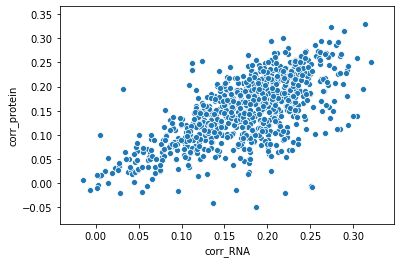

In [26]:
sns.scatterplot(x='corr_RNA', y='corr_protein', data=df)

## all omic individually

In [450]:
mutation_wide.T.to_csv("../data/genomic/WES_variants_processed.csv")

In [454]:
cna_sample.set_index(['GENE_ID']).T.to_csv("../data/cna/copynumber_processed.csv")

In [457]:
methy_sample.set_index(['GENE_ID']).T.to_csv("../data/methylation/methy_beta_gene_promoter_processed.csv")

In [463]:
d = pd.read_csv("../data/genomic/WES_variants_processed.csv.gz")

In [464]:
d.head()

,Cell_line,A1BG,A1CF,A2M,A2ML1,A4D226,A4GALT,A4GNT,AAAS,AACS,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAGAB,AAK1,AAMP,AANAT,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,...,ZSCAN5A,ZSCAN5B,ZSCAN5C,ZSCAN5D,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,hCG_17324,hsa-mir-4763
0,K052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TE-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TMK-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,STS-0421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PL4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# combined GO

In [241]:
df_list = []
for fp in glob.glob("../data/iprofun/goseq/*.tsv"):
    tissue = re.search(r"..\/data\/iprofun\/goseq\/(.*)_(.*)\.tsv", fp).group(1)
    source = re.search(r"..\/data\/iprofun\/goseq\/(.*)_(.*)\.tsv", fp).group(2)
    df = pd.read_csv(fp, sep='\t')
    df['tissue'] = tissue
    df['source'] = source
    df_list.append(df)
df_all = pd.concat(df_list)

In [243]:
df_all.to_csv("../data/iprofun/go_seq_combinded.tsv", sep='\t', index=False)

# remove control

In [41]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map.txt", sep='\t')
meta = meta[~meta['Cell_line'].str.startswith('Control_')]
meta.to_csv("../data/protein/E0022_P06_final_sample_map_no_control.txt", sep='\t', index=False)

In [42]:
protein_raw = pd.read_csv("../data/protein/E0022_P06_Protein_Matrix_Raw.tsv", sep='\t')
protein_raw = protein_raw[~protein_raw['Cell_line'].str.startswith('Control_')]
protein_raw.to_csv("../data/protein/E0022_P06_Protein_Matrix_Raw_no_control.txt", sep='\t', index=False)

In [43]:
protein_median = pd.read_csv("../data/protein/E0022_P06_Protein_Matrix_Median.tsv", sep='\t')
protein_median = protein_median[~protein_median['Cell_line'].str.startswith('Control_')]
protein_median.to_csv("../data/protein/E0022_P06_Protein_Matrix_Median_no_control.txt", sep='\t', index=False)

In [62]:
protein_RUV = pd.read_csv("../data/protein/E0022_P06_Protein_Matrix_ProNorM_update.tsv", sep='\t')
protein_RUV = protein_RUV[~protein_RUV['Cell_line'].str.startswith('Control_')]
protein_RUV.to_csv("../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control_update.txt", sep='\t', index=False)

In [45]:
protein_raw = protein_raw.set_index('Cell_line')

In [46]:
protein_raw_median = protein_raw.apply(lambda row:row-np.nanmedian(row), axis=1)

In [49]:
protein_raw_median.to_csv("../data/E0022_P06_Protein_Matrix_RawMedian_no_control.txt", sep='\t')

In [33]:
protein_median.shape

(979, 3144)

In [34]:
protein_raw.shape

(979, 3596)

In [36]:
protein_RUV.shape

(979, 3432)

# RUV TR

In [44]:
pd.isna(protein_RUV).sum().sum()

784404

In [31]:
protein_rep = pd.read_csv("../data/protein/E0022_P06_Protein_Matrix_Replicate_ProNorM.tsv", sep='\t')

In [36]:
protein_rep = protein_rep.rename(columns={'Unnamed: 0': 'Automatic_MS_filename'})
protein_rep_merge = pd.merge(protein_rep, meta[['Automatic_MS_filename', 'Cell_line']])
protein_rep_merge_tr = protein_rep_merge[['Automatic_MS_filename', 'Cell_line']]

In [ ]:
protein_rep_merge_tr = protein_rep_merge.groupby('Cell_line').transform(
    lambda x: x.fillna(x.mean()))

In [41]:
for col in tqdm_notebook(
        protein_rep_merge.drop(['Automatic_MS_filename', 'Cell_line'],
                               axis=1).columns):
    subset = ['Cell_line'] + [col]
    protein_rep_merge_tr[col] = protein_rep_merge[subset].groupby(
        'Cell_line').transform(lambda x: x.fillna(x.mean()))[col]

/Users/scai/anaconda3/envs/sklearn22/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



/Users/scai/anaconda3/envs/sklearn22/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
pd.isna(protein_rep).sum().sum()

7158495

In [45]:
pd.isna(protein_rep_merge_tr).sum().sum()

4807376

In [52]:
protein_rep_merge_tr.to_csv(
    "../data/protein/E0022_P06_Protein_Matrix_Replicate_ProNorM_TR.tsv",
    sep='\t',
    index=False)

# separate train test

In [22]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt", sep='\t')

In [23]:
data_sample = pd.read_csv("../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control.txt", sep='\t')

In [24]:
data_sample.head()

,Cell_line,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,1433S_HUMAN,1433T_HUMAN,1433Z_HUMAN,1A03_HUMAN,2A5E_HUMAN,...,ZN687_HUMAN,ZN706_HUMAN,ZN768_HUMAN,ZNT9_HUMAN,ZO1_HUMAN,ZO2_HUMAN,ZPR1_HUMAN,ZRAB2_HUMAN,ZW10_HUMAN,ZYX_HUMAN
0,201T,0.096927,-0.568128,-0.835446,0.391788,2.414299,-0.442038,0.025630,NaN,-0.446093,...,NaN,-1.016997,NaN,NaN,0.029303,-0.166752,-0.307667,-0.180132,-0.486825,0.804064
1,22RV1,-1.022789,-0.798627,-0.891601,-0.144772,0.543382,-1.017627,-0.993086,NaN,-0.281980,...,-1.445538,-0.977582,NaN,0.526681,-0.639151,-0.618681,-1.569439,-0.550486,-0.281257,-2.002678
2,23132-87,0.645785,0.030623,0.532326,0.092527,1.155763,-0.271380,1.490791,NaN,-0.361528,...,NaN,0.624945,NaN,NaN,0.014229,-0.018313,-0.640891,-0.512361,-0.281383,-0.429577
3,42-MG-BA,1.186552,-0.006448,0.391617,0.973264,NaN,0.236020,0.392404,NaN,0.951932,...,NaN,NaN,NaN,NaN,0.154674,-0.709740,0.520885,-0.003729,0.130263,0.731147
4,451Lu,-1.310509,-0.954998,-0.798605,-0.647663,NaN,-1.247045,-1.012624,NaN,NaN,...,0.348791,-0.065898,NaN,NaN,-1.028514,-1.287335,-0.607586,-0.574125,-0.394942,-1.037238


In [25]:
seed = 42

In [26]:
cell_lines_train, cell_lines_test = train_test_split(sorted(data_sample['Cell_line'].unique()),
                                                     test_size=0.2,
                                                     random_state=seed)

In [29]:
data_sample[data_sample['Cell_line'].isin(cell_lines_train)].reset_index(
    drop=True).to_csv("../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control_train.txt",
                      sep='\t',
                      index=False)

In [30]:
data_sample[data_sample['Cell_line'].isin(cell_lines_test)].reset_index(
    drop=True).to_csv("../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control_test.txt",
                      sep='\t',
                      index=False)

In [14]:
data_raw = pd.read_csv("../data/rna/rnaseq_voom.csv", index_col=0).T
data_raw.index.name = 'SIDM'
data_raw = data_raw.reset_index()
data_sample = pd.merge(data_raw, meta[['SIDM', 'Cell_line']].drop_duplicates()).drop(['SIDM'],
                                                                                     axis=1)
data_sample = data_sample.sort_values(by=['Cell_line'])
data_sample = data_sample.set_index(['Cell_line'])
data_sample = data_sample.reset_index()

In [17]:
data_sample[data_sample['Cell_line'].isin(cell_lines_train)]

,Cell_line,TSPAN6,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ACACA,C11orf98,MRM1,GOLGA6L10,HIST1H3H,MRPL45,GATD3B,PLAC4,CCDC163,PAGR1
0,201T,6.08893,5.72534,4.62169,3.00630,-8.17803,6.90997,7.96241,7.52120,5.91700,...,7.80127,2.63854,3.09699,2.28651,-1.39011,5.93807,-0.63617,-4.67719,0.47572,1.06811
1,22RV1,2.87481,5.32473,4.75520,5.15319,-5.74522,-3.13134,5.93753,7.73612,6.32057,...,8.32831,2.68690,3.28429,0.13659,1.42523,5.32288,2.12034,-4.02007,2.76399,3.69831
2,23132-87,3.45790,6.15659,5.60868,4.60965,-6.87175,-0.99893,8.13516,7.66560,5.54338,...,7.95904,2.76943,2.98955,2.11842,1.25245,5.47300,-0.45724,-0.46003,2.93994,3.12995
3,42-MG-BA,5.22289,6.19178,3.34193,4.03735,-5.07341,-0.70395,6.32845,4.27009,5.54099,...,6.80444,2.82702,2.08750,0.79449,1.11228,4.81609,2.10370,-1.21831,2.34013,3.26198
4,451Lu,4.83637,6.09929,3.76191,5.16142,-5.07890,-3.32855,7.12019,5.05077,5.69443,...,7.32499,2.33684,2.78302,0.58247,-1.83180,4.46026,3.13682,-3.29502,1.43244,2.60694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,WM793B,3.80434,6.68170,4.65719,4.50685,-4.29601,-1.40111,6.90516,5.21393,6.19010,...,6.43315,2.29484,2.53666,0.46814,-1.62472,4.94729,1.74381,-2.68505,-0.17287,2.32915
956,WSU-NHL,-2.01899,5.59459,4.88585,6.21005,2.40446,-6.67498,5.37029,5.66020,6.13733,...,7.80084,3.17232,4.69666,0.24427,1.09434,6.08776,2.72933,-2.54209,2.90998,2.95140
958,YH-13,5.06931,5.00097,3.85626,4.09650,-3.30933,7.93102,7.32920,4.22332,5.73316,...,7.78482,1.74384,3.01396,1.12701,1.01117,5.09681,1.79803,-2.38564,0.28310,2.97658
961,ZR-75-30,5.12948,5.89760,5.84290,4.62974,-5.24043,-5.14223,5.69290,6.95877,5.64459,...,8.73200,2.75130,2.11248,2.18850,1.46661,8.24556,2.27553,-1.26376,1.24042,3.45537


In [21]:
data_sample[data_sample['Cell_line'].isin(cell_lines_train)].reset_index(
    drop=True).to_csv("../data/rna/rnaseq_voom_train.tsv",
                      sep='\t',
                      index=False)

In [20]:
data_sample[data_sample['Cell_line'].isin(cell_lines_test)].reset_index(
    drop=True).to_csv("../data/rna/rnaseq_voom_test.tsv",
                      sep='\t',
                      index=False)

# 1 percentile imputation

## all sanger

In [47]:
data_sample = pd.read_csv("../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control_update.txt", sep='\t')

In [48]:
data_sample = data_sample.drop(['Cell_line'],axis=1)

In [49]:
data_sample_flat = data_sample.values.flatten()
data_sample_flat = data_sample_flat[~np.isnan(data_sample_flat)]

In [50]:
np.percentile(data_sample_flat, 1)

-2.2426022076053904

## sanger vs ccle

In [468]:
data_sample = pd.read_csv("../data/ccle/protein_matrix_common_ruv.tsv", sep='\t')

In [469]:
data_sample = data_sample.drop(['Cell_line'],axis=1)
data_sample_flat = data_sample.values.flatten()
data_sample_flat = data_sample_flat[~np.isnan(data_sample_flat)]
np.percentile(data_sample_flat, 1)

-2.27000832473339

# CCLE drug mapping

In [337]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt", sep='\t')
protein_RUV = pd.read_csv("../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control_update.txt", sep='\t')
ic50 = pd.read_csv(
    "../data/drug/drug_final_processed.csv.gz", low_memory=False)

df_broad = pd.read_csv('../data/ccle/protein_quant_current_normalized.csv')
df_broad = df_broad.drop(
    ['Protein_Id', 'Gene_Symbol', 'Description', 'Group_ID', 'Uniprot_Acc'],
    axis=1).rename(columns={
        'Uniprot': 'Protein'
    }).set_index('Protein')
df_broad = df_broad.drop([
    'SW948_LARGE_INTESTINE_TenPx11', 'CAL120_BREAST_TenPx02',
    'HCT15_LARGE_INTESTINE_TenPx30'
],
                         axis=1)
rename_dict = {}
for x in df_broad.columns.to_list():
    rename_dict[x] = x.split('_TenPx')[0]
df_broad = df_broad.rename(columns=rename_dict)
df_broad = df_broad.drop(
    [x for x in df_broad.columns.tolist() if 'TenPx' in x],
    axis=1).transpose()

curr_dict = meta[['CCLE_ID','Cell_line']].drop_duplicates().set_index('CCLE_ID').to_dict()['Cell_line']
df_broad_sanger_name = df_broad.index.map(curr_dict)

common_lines_broad = [x for x in df_broad_sanger_name if x in protein_RUV['Cell_line'].values]
print('Number of common cell lines: ',len(common_lines_broad))

len(set(common_lines_broad))
df_broad_common = df_broad[df_broad.index.map(curr_dict).isin(common_lines_broad)]

Number of common cell lines:  295


In [338]:
meta_cell = pd.read_csv("../data/ccle/secondary-screen-cell-line-info.csv")
meta_drug = pd.read_csv("../data/ccle/secondary-screen-replicate-collapsed-treatment-info.csv")

In [339]:
ccle_drug = pd.read_csv("../data/ccle/secondary-screen-dose-response-curve-parameters.csv", low_memory=False)
ccle_drug = ccle_drug.sort_values(by=['screen_id']).drop_duplicates(['broad_id', 'ccle_name'], keep='last')


In [340]:
ccle_drug = ccle_drug.rename(columns={'broad_id':'drug_id'})
ccle_drug['cell_line_name'] = ccle_drug['ccle_name'].map(curr_dict)
ccle_drug = ccle_drug.sort_values(by=['screen_id']).drop_duplicates(['drug_id', 'cell_line_name'], keep='last')
ccle_drug = ccle_drug[~pd.isna(ccle_drug['cell_line_name'])]

In [341]:
ccle_drug = ccle_drug.replace([np.inf, -np.inf], np.nan)
# ccle_drug = ccle_drug[~pd.isna(ccle_drug['ic50'])]

ccle_drug = ccle_drug[ccle_drug['auc']<3]
# ccle_drug = ccle_drug[ccle_drug['ic50']<4]

ccle_drug = ccle_drug[ccle_drug['cell_line_name'].isin(common_lines_broad)]

# ccle_drug['AUC_norm_scaled'] = MinMaxScaler().fit_transform(ccle_drug['auc'].values.reshape(-1,1))
# ccle_drug['IC50_norm_scaled'] = MinMaxScaler().fit_transform(ccle_drug['ic50'].values.reshape(-1,1))

In [342]:
ccle_drug_counts = ccle_drug.groupby(['drug_id']).size().sort_values()

Text(0, 0.5, 'Number of drugs')

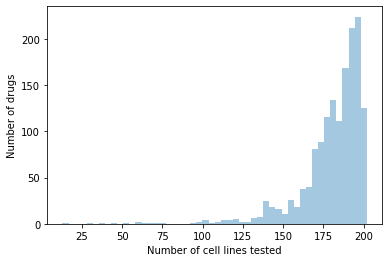

In [343]:
sns.distplot(ccle_drug_counts, kde=False)
plt.xlabel("Number of cell lines tested")
plt.ylabel("Number of drugs")

In [344]:
selected_drugs = ccle_drug_counts[ccle_drug_counts>150].index.values

In [345]:
ccle_drug = ccle_drug[ccle_drug['drug_id'].isin(selected_drugs)]

In [346]:
ccle_drug.groupby(['screen_id']).size()

screen_id
HTS002    217765
MTS005       340
MTS006     12172
MTS010     26653
dtype: int64

In [347]:
ccle_drug[(ccle_drug['drug_id']=='BRD-K95142244-001-01-5') & (ccle_drug['cell_line_name']=='SNU-C5')]

,drug_id,depmap_id,ccle_name,screen_id,upper_limit,lower_limit,slope,r2,auc,ec50,ic50,name,moa,target,disease.area,indication,smiles,phase,passed_str_profiling,row_name,cell_line_name
696822,BRD-K95142244-001-01-5,ACH-000970,SNUC5_LARGE_INTESTINE,MTS010,1,1.495143,2.453189,0.492087,1.0,0.019515,NaN,talazoparib,PARP inhibitor,PARP2,NaN,NaN,Cn1ncnc1[C@@H]1[C@H](Nc2cc(F)cc3c2c1n[nH]c3=O)...,Phase 3,True,ACH-000970,SNU-C5


In [348]:
ccle_drug.shape

(256930, 21)

In [350]:
ccle_drug = ccle_drug.rename(columns={'name':'drug_name'})

In [351]:
ccle_drug[['cell_line_name', 'drug_id','drug_name', 'auc'
           ]].to_csv("../data/ccle/drug_all_ccle_secondary_processed_auc.csv",
                     index=False)

In [496]:
ccle_drug[['cell_line_name', 'Drug Id', 'IC50_norm_scaled'
           ]].to_csv("../data/ccle/drug_all_ccle_secondary_processed_ic50.csv",
                     index=False)

In [198]:
train_cell_lines, test_cell_lines = train_test_split(
    ccle_drug['Cell line name'].unique(), test_size=0.2, random_state=42)

In [22]:
pd.DataFrame({
    'Cell_line': train_cell_lines
}).to_csv("../data/misc/vs_ccle_common_cell_line_train_secondary.tsv",
          sep='\t',
          index=False)
pd.DataFrame({
    'Cell_line': test_cell_lines
}).to_csv("../data/misc/vs_ccle_common_cell_line_test_secondary.tsv",
          sep='\t',
          index=False)

# cancer type

## cell line level

### protein

In [4]:
protein_sample = pd.read_csv("../data/protein/E0022_P06_Protein_Matrix_ProNorM_no_control.txt",sep='\t')

meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt",sep='\t')

cancer_type_map = meta[[
    'Cell_line', 'Cancer_type', 'Tissue_type'
]].drop_duplicates().set_index('Cell_line').to_dict()['Cancer_type']
tissue_type_map = meta[[
    'Cell_line', 'Cancer_type', 'Tissue_type'
]].drop_duplicates().set_index('Cell_line').to_dict()['Tissue_type']

protein_sample['Cancer_type'] = protein_sample['Cell_line'].map(cancer_type_map)
protein_sample['Tissue_type'] = protein_sample['Cell_line'].map(tissue_type_map)

In [8]:
type_count = protein_sample.groupby(['Cancer_type']).size()
selected_types = type_count.index.values
# selected_types = type_count[type_count > 20].index.values
protein_sample[protein_sample['Cancer_type'].isin(selected_types)].groupby(['Cancer_type']).size()

Cancer_type
Acute Myeloid Leukemia                30
B-Cell Non-Hodgkin's Lymphoma         40
B-Lymphoblastic Leukemia              18
Biliary Tract Carcinoma                5
Bladder Carcinoma                     19
Breast Carcinoma                      51
Burkitt's Lymphoma                    13
Cervical Carcinoma                    13
Chondrosarcoma                         6
Chronic Myelogenous Leukemia          10
Colorectal Carcinoma                  49
Endometrial Carcinoma                 10
Esophageal Carcinoma                   9
Esophageal Squamous Cell Carcinoma    26
Ewing's Sarcoma                       24
Gastric Carcinoma                     28
Glioblastoma                          38
Glioma                                15
Head and Neck Carcinoma               18
Hepatocellular Carcinoma              17
Hodgkin's Lymphoma                     7
Kidney Carcinoma                      32
Melanoma                              51
Mesothelioma                          21
Neur

In [9]:
type_count = protein_sample.groupby(['Tissue_type']).size()
selected_types = type_count.index.values
# selected_types = type_count[type_count > 20].index.values
protein_sample[protein_sample['Tissue_type'].isin(selected_types)].groupby(['Tissue_type']).size()

Tissue_type
Adrenal Gland                    1
Biliary Tract                    5
Bladder                         19
Bone                            42
Breast                          51
Central Nervous System          58
Cervix                          14
Endometrium                     11
Esophagus                       35
Haematopoietic and Lymphoid    171
Head and Neck                   41
Kidney                          33
Large Intestine                 49
Liver                           17
Lung                           194
Ovary                           41
Pancreas                        31
Peripheral Nervous System       30
Placenta                         2
Prostate                         8
Skin                            53
Small Intestine                  1
Soft Tissue                     18
Stomach                         28
Testis                           3
Thyroid                         16
Uterus                           3
Vulva                            4
dtype: i

In [17]:
protein_sample[protein_sample['Cancer_type'] == 'Non-Cancerous']

,Cell_line,1433B_HUMAN,1433E_HUMAN,1433F_HUMAN,1433G_HUMAN,1433S_HUMAN,1433T_HUMAN,1433Z_HUMAN,1A03_HUMAN,2A5E_HUMAN,...,ZN768_HUMAN,ZNT9_HUMAN,ZO1_HUMAN,ZO2_HUMAN,ZPR1_HUMAN,ZRAB2_HUMAN,ZW10_HUMAN,ZYX_HUMAN,Cancer_type,super_type
37,ARH-77,0.660209,0.043053,0.199418,0.452744,-0.439870,-0.067828,0.464885,NaN,0.136659,...,NaN,-1.078215,-0.594837,-0.713008,-0.049305,0.301080,-0.009459,-0.391067,Non-Cancerous,Non-Cancerous
60,BPH-1,-2.100723,-2.464104,-1.601723,-2.677680,-0.396239,-2.447908,-2.351634,-0.652941,NaN,...,NaN,NaN,-0.869613,-0.306671,NaN,-0.742041,-1.047083,NaN,Non-Cancerous,Non-Cancerous
312,Hs-445,0.837032,0.692045,1.105064,0.205355,-0.523317,0.139277,0.590428,NaN,0.138526,...,-0.97427,0.434917,-0.539679,-0.610124,-0.269323,0.340105,-0.491039,-0.693175,Non-Cancerous,Non-Cancerous
332,IM-9,-0.558581,-0.654748,-0.667230,-0.058786,-0.885628,-1.010095,-0.787833,NaN,0.000007,...,NaN,NaN,-1.439088,-1.825412,-0.126959,-0.008493,0.013228,-0.750119,Non-Cancerous,Non-Cancerous
466,MC-CAR,0.694135,0.143998,0.812153,0.455495,-0.749516,0.289045,0.730099,NaN,0.570707,...,NaN,NaN,0.156297,-1.897779,-0.153325,0.142367,-0.506160,NaN,Non-Cancerous,Non-Cancerous
747,PWR-1E,1.198796,1.382524,1.156196,0.533611,0.107856,1.178186,1.716622,NaN,NaN,...,NaN,NaN,0.359767,0.761508,-0.487469,0.142059,0.447760,1.578446,Non-Cancerous,Non-Cancerous
777,RPMI-6666,0.063209,-0.341794,-0.319615,0.084570,-1.648887,-0.474941,-0.286230,1.725357,-0.257602,...,NaN,NaN,0.041868,-0.641296,0.389000,-0.127427,-0.013431,-0.098325,Non-Cancerous,Non-Cancerous
962,WIL2-NS,0.807711,0.597469,0.713792,0.293051,-0.778489,0.298858,-0.097781,NaN,0.358525,...,NaN,NaN,NaN,-0.691702,-0.230527,0.005078,-0.341519,-0.041184,Non-Cancerous,Non-Cancerous


In [51]:
protein_sample.to_csv("../data/cancer_type/cancer_tissue_type_protein.tsv", sep='\t', index=False)

### RNA

In [77]:
data_raw = pd.read_csv('../data/rna/rnaseq_voom.csv', index_col=0).T
data_raw.index.name = 'SIDM'
data_raw = data_raw.reset_index()
rna_sample = pd.merge(data_raw, meta[['SIDM', 'Cell_line']].drop_duplicates()).drop(['SIDM'],
                                                                                         axis=1)
meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt",sep='\t')

cancer_type_map = meta[[
    'Cell_line', 'Cancer_type', 'Tissue_type'
]].drop_duplicates().set_index('Cell_line').to_dict()['Cancer_type']
tissue_type_map = meta[[
    'Cell_line', 'Cancer_type', 'Tissue_type'
]].drop_duplicates().set_index('Cell_line').to_dict()['Tissue_type']

rna_sample['Cancer_type'] = rna_sample['Cell_line'].map(cancer_type_map)
rna_sample['Tissue_type'] = rna_sample['Cell_line'].map(tissue_type_map)

In [83]:
rna_sample = rna_sample.sort_values(by='Cell_line')

In [80]:
rna_sample.to_csv("../data/cancer_type/cancer_tissue_type_rna.tsv", sep='\t', index=False)

## rep level

In [52]:
protein_sample = pd.read_csv("../data/protein/E0022_P06_Protein_Matrix_Replicate_ProNorM_TR.tsv.gz",sep='\t')

In [53]:
cancer_type_map = meta[[
    'Cell_line', 'Cancer_type', 'Tissue_type'
]].drop_duplicates().set_index('Cell_line').to_dict()['Cancer_type']
tissue_type_map = meta[[
    'Cell_line', 'Cancer_type', 'Tissue_type'
]].drop_duplicates().set_index('Cell_line').to_dict()['Tissue_type']

In [54]:
protein_sample['Cancer_type'] = protein_sample['Cell_line'].map(cancer_type_map)
protein_sample['Tissue_type'] = protein_sample['Cell_line'].map(tissue_type_map)

In [56]:
protein_sample.groupby(['Tissue_type']).size()

Tissue_type
Adrenal Gland                     6
Biliary Tract                    32
Bladder                         117
Bone                            255
Breast                          319
Central Nervous System          352
Cervix                           86
Endometrium                      68
Esophagus                       224
Haematopoietic and Lymphoid    1052
Head and Neck                   246
Kidney                          208
Large Intestine                 309
Liver                           104
Lung                           1197
Ovary                           248
Pancreas                        192
Peripheral Nervous System       188
Placenta                         14
Prostate                         49
Skin                            323
Small Intestine                   6
Soft Tissue                     114
Stomach                         178
Testis                           22
Thyroid                          97
Uterus                           18
Vulva           

In [57]:
protein_sample.to_csv("../data/cancer_type/cancer_tissue_type_protein_rep.tsv", sep='\t', index=False)

In [ ]:
#

# combine ToppGene

In [38]:
writer = pd.ExcelWriter('../data/toppgene/all_GO.xlsx', engine='xlsxwriter')
for fp in glob.glob("../data/toppgene/*tsv"):
    tissue = fp.replace("../data/toppgene/", "").replace(".tsv", "")
    df = pd.read_csv(fp, sep='\t', encoding='unicode_escape')
    df.to_excel(writer, sheet_name=tissue, index=False)
writer.save()

# merge drug type

In [17]:
drug_type = pd.read_csv("../data/drug/Dataset_EV2.csv")
drug_meta = pd.read_csv("../data/drug/202004092336_drug_scores.tsv", sep='\t')

In [19]:
drug_type_map = drug_type.set_index(['Drug ID']).to_dict()['Drug Type']

In [20]:
drug_meta['Drug_Type'] = drug_meta['Drug Id'].map(drug_type_map)

In [21]:
drug_meta.to_csv("../data/drug/202004092336_drug_scores.tsv", index=False, sep='\t')

# FDA approval

In [18]:
drug_meta = pd.read_csv("../data/drug/screened_compunds_rel_8.2.csv")
fda_approval = [x.lower() for x in pd.read_csv("../data/drug/FDA_approved.csv")['DRUG_NAME'].values]

In [27]:
drug_meta['FDA_Approved'] = 'Yes'

In [35]:
for index, row in drug_meta.iterrows():
    drug_names = [row['DRUG_NAME'].lower()]
    if not pd.isna(row['SYNONYMS']):
        drug_names.extend([x.strip().lower() for x in row['SYNONYMS'].split(',')])
    fda_approved = False
    for name in drug_names:
        for fda_name in fda_approval:
            if name in fda_name:
                fda_approved = True
                break
    if fda_approved:
        drug_meta.loc[index, 'FDA_Approved'] = 'Yes'
    else:
        drug_meta.loc[index, 'FDA_Approved'] = 'NotConfirmed'

In [36]:
drug_meta.groupby(['FDA_Approved']).size()

FDA_Approved
NotConfirmed    420
Yes              98
dtype: int64

In [38]:
drug_meta.to_csv("../data/drug/screened_compunds_rel_8.2.csv", index=False)


# CRISPR

In [67]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt", sep='\t')

cell_line_name_map = meta[['SIDM','Cell_line']].drop_duplicates().set_index('SIDM').to_dict()['Cell_line']
cell_line_name_map_broad = meta[[
    'BROAD_ID', 'Cell_line'
]].drop_duplicates().set_index('BROAD_ID').to_dict()['Cell_line']

In [68]:
cell_line_name_map.update(cell_line_name_map_broad)

crispr = pd.read_csv("../data/crispr/CRISPRcleanR_FC_SIDM.csv", index_col=0)

col_mapped = [x for x in crispr.columns if x in cell_line_name_map]

crispr = crispr[col_mapped]

crispr.columns = [cell_line_name_map[x] for x in col_mapped]

crispr.index.name = 'Gene'

crispr = crispr.reset_index()

crispr.to_csv("../data/crispr/final_crispr.csv", index=False)

In [ ]:
crispr.to_csv("../data/crispr/final_crispr.csv", index=False)

In [40]:
crispr_melt = crispr.melt(id_vars='Gene', var_name='Cell line name', value_name='logFC')

In [41]:
crispr_melt['Cell line name'] = crispr_melt['Cell line name'].map(cell_line_name_map)

In [43]:
crispr_melt.to_csv("../data/crispr/final_crispr_long.csv", index=False)

## MOFA factor

In [76]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt", sep='\t')

cell_line_name_map = meta[['SIDM','Cell_line']].drop_duplicates().set_index('SIDM').to_dict()['Cell_line']
cell_line_name_map_broad = meta[[
    'BROAD_ID', 'Cell_line'
]].drop_duplicates().set_index('BROAD_ID').to_dict()['Cell_line']
cell_line_name_map.update(cell_line_name_map_broad)


In [74]:
mofa_factors = pd.read_csv("../data/crispr/MultiOmics_Sanger&CMRI_factors_largek.csv", index_col=0)

In [78]:
mofa_factors.index = mofa_factors.index.map(cell_line_name_map)

In [80]:
mofa_factors.index.name = 'Cell_line'
mofa_factors = mofa_factors.reset_index()

In [83]:
mofa_factors.to_csv("../data/crispr/mofa_largek_processed.tsv", index=False, sep='\t')

# new drug

In [5]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt", sep='\t')

In [33]:
ic50 = pd.read_csv("../data/drug/DrugResponse_PANCANCER_GDSC1_GDSC2_20200605.csv.gz", low_memory=False)

In [35]:
ic50 = ic50.sort_values(by=['dataset']).reset_index(drop=True)
ic50 = ic50.drop_duplicates(
    ['drug_id', 'cell_line_name'], keep='last').sort_values(
        by=['drug_id', 'cell_line_name']).reset_index(drop=True)
ic50 = ic50[ic50['cell_line_name'].isin(meta['Cell_line'].unique())]

In [37]:
ic50['IC50_raw'] = np.exp(ic50['ln_IC50'])

ic50['IC50_norm_raw'] = ic50['IC50_raw'] / ic50['max_screening_conc']

ic50['IC50_norm'] = np.log(ic50['IC50_norm_raw'])

ic50['sensitive'] = (ic50['IC50_raw'] < ic50['max_screening_conc']).astype(int)

ic50['IC50_norm_scaled'] = MinMaxScaler().fit_transform(ic50['IC50_norm'].values.reshape(-1,1))

In [21]:
ic50.head()

,num_replicates,RMSE,drug_id,sample_treatment,putative_target,model_treatment,model_name,msi_status,CHEMBL,cell_line_name,model_synonyms,cancer_type_detail,drug_name,putative_gene_target,use_in_publications,model_type,drug_synonyms,RRID,dataset,ln_IC50,model_id,drug_owner,BROAD_ID,master_cell_id,sample_treatment_details,max_screening_conc,cancer_type,target_pathway,tissue,sample_site,growth_properties,webrelease,COSMIC_ID,AUC,PUBCHEM,IC50_raw,IC50_norm_raw,IC50_norm,sensitive,IC50_norm_scaled
0,1.0,0.049765,1,Unknown,EGFR,NaN,697,MSS,CHEMBL553,697,Line 697;EU-3,B Acute Lymphoblastic Leukemia,Erlotinib,EGFR,Y,Cell Line,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",CVCL_0079,GDSC1,0.742910,SIDM01076,MGH,ACH-000070,63,NaN,2.0,B-Lymphoblastic Leukemia,EGFR signaling,Haematopoietic and Lymphoid,Bone marrow,Suspension,Y,906800,0.913203,176870,2.102044,1.051022,0.049763,0,0.614742
1,1.0,0.041886,1,None,EGFR,NaN,8-MG-BA,MSS,CHEMBL553,8-MG-BA,NaN,Glioblastoma,Erlotinib,EGFR,Y,Cell Line,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",CVCL_1052,GDSC1,2.494777,SIDM00998,MGH,ACH-000137,1207,NaN,2.0,Glioblastoma,EGFR signaling,Central Nervous System,Frontal Brain lobe,Adherent,Y,687562,0.980211,176870,12.119031,6.059515,1.801630,0,0.719434
3,2.0,0.135201,1,Unknown,EGFR,NaN,A253,MSS,CHEMBL553,A253,NaN,Salivary Gland Squamous Cell Carcinoma,Erlotinib,EGFR,Y,Cell Line,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",CVCL_1060,GDSC1,0.164247,SIDM00796,MGH,ACH-000740,2089,NaN,2.0,Head and Neck Carcinoma,EGFR signaling,Head and Neck,Submaxillary salivary gland,Adherent,Y,906794,0.817106,176870,1.178506,0.589253,-0.528900,1,0.580161
4,1.0,0.053414,1,Unknown,EGFR,NaN,A3-KAW,MSS,CHEMBL553,A3-KAW,A3/Kawakami,Diffuse Large B-Cell Lymphoma,Erlotinib,EGFR,Y,Cell Line,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",CVCL_1062,GDSC1,1.110712,SIDM00495,MGH,ACH-000697,1511,NaN,2.0,B-Cell Non-Hodgkin's Lymphoma,EGFR signaling,Haematopoietic and Lymphoid,Ascites,Suspension,Y,910935,0.950440,176870,3.036521,1.518260,0.417565,0,0.636722
5,1.0,0.130232,1,Unknown,EGFR,NaN,A388,MSS,CHEMBL553,A388,NaN,Squamous Cell Carcinoma,Erlotinib,EGFR,Y,Cell Line,"Tarceva, RG-1415, CP-358774, OSI-774, Ro-50823...",CVCL_1063,GDSC1,-0.080422,SIDM00794,MGH,ACH-001442,948,NaN,2.0,Other Solid Carcinomas,EGFR signaling,Skin,Lymph node,Adherent,Y,910697,0.771519,176870,0.922727,0.461363,-0.773570,1,0.565539


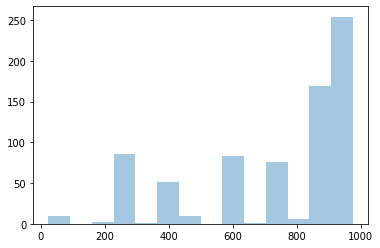

In [25]:
sns.distplot(ic50.groupby(['drug_id']).size(), kde=False)

In [26]:
ic50.groupby(['dataset']).size()

dataset
GDSC1    269205
GDSC2    279324
dtype: int64

In [29]:
tmp = ic50.groupby(['drug_id']).size()

In [31]:
tmp[(tmp > 250)&(tmp < 380)].sort_values()

drug_id
1507    260
2169    274
1096    275
1553    275
1593    275
3       350
2220    371
2252    371
2235    372
2243    372
83      376
dtype: int64

In [28]:
tmp.sort_values()

DRUG_ID
2638     29
2502     29
2459     29
2265     30
2261    225
       ... 
1046    990
1529    990
1050    991
1038    991
1060    991
Length: 727, dtype: int64

In [45]:
ic50

,DRUG_NAME,CELL_LINE_NAME,WEBRELEASE,DRUG_ID,RMSE,MAX_CONC,SANGER_MODEL_ID,LN_IC50,AUC,DATASET,COSMIC_ID,IC50_raw,IC50_norm_raw,IC50_norm,sensitive,IC50_norm_scaled
0,Erlotinib,697,Y,1,0.049765,2.0,SIDM01076,0.742914,0.913203,GDSC1,906800,2.102052,1.051026,0.049767,0,0.614742
1,Erlotinib,8-MG-BA,Y,1,0.041886,2.0,SIDM00998,2.494802,0.980211,GDSC1,687562,12.119334,6.059667,1.801655,0,0.719435
2,Erlotinib,A101D,Y,1,0.154550,2.0,SIDM00801,2.325466,0.940629,GDSC1,910921,10.231447,5.115723,1.632319,0,0.709316
3,Erlotinib,A253,Y,1,0.135200,2.0,SIDM00796,0.164247,0.817106,GDSC1,906794,1.178505,0.589253,-0.528900,1,0.580161
4,Erlotinib,A3-KAW,Y,1,0.053414,2.0,SIDM00495,1.110715,0.950440,GDSC1,910935,3.036529,1.518264,0.417568,0,0.636722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543671,AZD5991,PSN1,N,2638,0.075639,10.0,SIDM00469,2.467330,0.842019,GDSC2,910546,11.790925,1.179093,0.164745,0,0.621613
543672,AZD5991,SU8686,N,2638,0.058714,10.0,SIDM01188,5.759466,0.937823,GDSC2,1240218,317.178984,31.717898,3.456881,0,0.818352
543673,AZD5991,SUIT-2,N,2638,0.072388,10.0,SIDM00371,4.074914,0.907596,GDSC2,1240219,58.845428,5.884543,1.772329,0,0.717683
543674,AZD5991,SW1990,N,2638,0.077521,10.0,SIDM01165,3.757604,0.867888,GDSC2,910907,42.845665,4.284566,1.455019,0,0.698720


In [32]:
ic50.to_csv("../data/drug/drug_final_processed.csv", index=False)

## growth normalised

In [68]:
sample_info = pd.read_excel("../data/SamplesheetApril2020.xlsx",
                            sheet_name='Sheet1')
sample_info = sample_info.rename(columns={'model_name': 'cell_line_name'})
sample_info['growth'] = MinMaxScaler((0.1, 2.5)).fit_transform(
    SimpleImputer().fit_transform(sample_info['growth'].values.reshape(
        -1, 1))).flatten()
growth_map = sample_info.set_index('cell_line_name').to_dict()['growth']

In [69]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt", sep='\t')

In [70]:
ic50 = pd.read_csv("../data/drug/DrugResponse_PANCANCER_GDSC1_GDSC2_20200605.csv.gz", low_memory=False)

In [71]:
ic50 = ic50.sort_values(by=['dataset']).reset_index(drop=True)
ic50 = ic50.drop_duplicates(
    ['drug_id', 'cell_line_name'], keep='last').sort_values(
        by=['drug_id', 'cell_line_name']).reset_index(drop=True)
ic50 = ic50[ic50['cell_line_name'].isin(meta['Cell_line'].unique())]

In [72]:
ic50['ln_IC50'] = ic50.apply(lambda row:row['ln_IC50'] / growth_map[row['cell_line_name']], axis=1)

In [73]:
ic50['IC50_raw'] = np.exp(ic50['ln_IC50'])

ic50['IC50_norm_raw'] = ic50['IC50_raw'] / ic50['max_screening_conc']

ic50['IC50_norm'] = np.log(ic50['IC50_norm_raw'])

ic50['sensitive'] = (ic50['IC50_raw'] < ic50['max_screening_conc']).astype(int)

ic50['IC50_norm_scaled'] = MinMaxScaler().fit_transform(ic50['IC50_norm'].values.reshape(-1,1))

In [75]:
ic50.to_csv("../data/drug/drug_final_processed_growth_norm.csv", index=False)

## regress out

In [140]:
sample_info = pd.read_excel("../data/SamplesheetApril2020.xlsx",
                            sheet_name='Sheet1')
sample_info = sample_info.rename(columns={'model_name': 'cell_line_name'})
sample_info['growth'] = SimpleImputer().fit_transform(
    sample_info['growth'].values.reshape(-1, 1)).flatten()
growth_map = sample_info.set_index('cell_line_name').to_dict()['growth']

In [141]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt", sep='\t')

In [142]:
ic50 = pd.read_csv("../data/drug/DrugResponse_PANCANCER_GDSC1_GDSC2_20200605.csv.gz", low_memory=False)

In [143]:
ic50 = ic50.sort_values(by=['dataset']).reset_index(drop=True)
ic50 = ic50.drop_duplicates(
    ['drug_id', 'cell_line_name'], keep='last').sort_values(
        by=['drug_id', 'cell_line_name']).reset_index(drop=True)
ic50 = ic50[ic50['cell_line_name'].isin(meta['Cell_line'].unique())]

In [144]:
ic50_wide = pd.pivot(ic50, index='cell_line_name', columns='drug_id', values='ln_IC50')

In [145]:
ic50_wide = pd.merge(ic50_wide, sample_info[['cell_line_name', 'growth']], on=['cell_line_name'])

In [146]:
ic50_wide = ic50_wide.set_index('cell_line_name')

In [147]:
for drug_id in ic50_wide.columns:
    if drug_id == 'growth':
        continue
    y = ic50_wide[~ic50_wide[drug_id].isna()][drug_id]
    x = ic50_wide[~ic50_wide[drug_id].isna()]['growth'].values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(x, y)
    y_pred = lr.predict(x)
    residual = y - y_pred
    ic50_wide.loc[~ic50_wide[drug_id].isna(), drug_id] = residual.values

In [148]:
pd.pivot(ic50, index='cell_line_name', columns='drug_id', values='ln_IC50')

drug_id,1,3,5,6,9,11,17,29,30,32,34,35,37,38,41,45,51,52,53,54,55,56,59,60,62,...,2325,2326,2327,2328,2329,2330,2331,2332,2333,2354,2359,2363,2365,2459,2460,2463,2466,2502,2503,2504,2505,2508,2509,2510,2638
cell_line_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.870982,5.901380,5.996507,5.636945,5.997801,4.637606,1.309036,2.721478,4.181515,NaN,NaN,NaN,5.638761,NaN,-3.627500,5.184041,-0.422523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22RV1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.787820,6.072041,5.858659,3.540457,6.786412,4.742216,0.555244,2.990707,2.973256,1.674832,6.409723,4.921199,5.401424,NaN,-0.768656,NaN,-0.725752,NaN,4.676666,4.450442,4.757823,-0.212632,0.494102,4.664021,NaN
23132-87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.620696,NaN,0.556695,NaN,5.438592,5.793948,5.793286,2.771553,4.419663,4.577746,NaN
42-MG-BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.458343,NaN,-0.464562,NaN,3.518116,4.709746,2.136491,2.214111,-0.470880,2.102269,NaN
451Lu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.831446,4.946957,6.305027,6.003010,5.940172,6.067511,1.819962,5.750885,4.157291,NaN,NaN,NaN,6.310095,NaN,-2.283345,4.571119,0.707160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YT,2.908260,-0.268395,2.698757,2.474392,1.098876,-0.061054,4.990366,1.853297,2.726187,2.765275,2.226785,2.858785,2.816411,2.543693,3.637532,1.846060,2.380412,1.085639,-0.023284,2.113494,3.842999,3.845487,4.260833,0.756876,3.850969,...,1.666867,4.628862,3.785652,2.918595,4.501810,2.196095,-2.399643,1.281605,1.563641,-4.303745,2.975300,1.167491,1.120026,NaN,-2.718116,NaN,-1.644927,NaN,2.734761,4.700374,2.852202,-0.624989,0.787039,2.770210,NaN
ZR-75-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.860491,7.339176,7.239524,5.574615,7.959680,7.788697,2.467134,6.139153,4.679489,3.733677,7.857623,5.264153,4.517664,NaN,5.370678,NaN,-0.679805,NaN,5.851197,6.041822,5.735743,5.627451,2.403586,6.918636,NaN
huH-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.447768,NaN,0.766528,NaN,6.628048,6.388593,3.923482,3.881492,4.391250,5.750049,NaN


In [149]:
ic50_corrected = pd.melt(ic50_wide.drop(['growth'], axis=1).reset_index(),
                         id_vars='cell_line_name',
                         var_name='drug_id',
                         value_name='ln_IC50')

In [150]:
ic50_corrected = pd.merge(ic50_corrected,
                          ic50.drop(['ln_IC50'], axis=1),
                          on=['cell_line_name', 'drug_id'])

In [151]:
ic50 = ic50_corrected

In [152]:
ic50['IC50_raw'] = np.exp(ic50['ln_IC50'])

ic50['IC50_norm_raw'] = ic50['IC50_raw'] / ic50['max_screening_conc']

ic50['IC50_norm'] = np.log(ic50['IC50_norm_raw'])

ic50['sensitive'] = (ic50['IC50_raw'] < ic50['max_screening_conc']).astype(int)

ic50['IC50_norm_scaled'] = MinMaxScaler().fit_transform(ic50['IC50_norm'].values.reshape(-1,1))

In [153]:
ic50.to_csv("../data/drug/drug_final_processed_growth_corrected.csv", index=False)

## regress out PC1

In [154]:
meta = pd.read_csv("../data/E0022_P06_final_sample_map_no_control.txt", sep='\t')

In [155]:
ic50 = pd.read_csv("../data/drug/DrugResponse_PANCANCER_GDSC1_GDSC2_20200605.csv.gz", low_memory=False)

In [156]:
ic50 = ic50.sort_values(by=['dataset']).reset_index(drop=True)
ic50 = ic50.drop_duplicates(
    ['drug_id', 'cell_line_name'], keep='last').sort_values(
        by=['drug_id', 'cell_line_name']).reset_index(drop=True)
ic50 = ic50[ic50['cell_line_name'].isin(meta['Cell_line'].unique())]

In [166]:
ic50_wide = pd.pivot(ic50, index='cell_line_name', columns='drug_id', values='ln_IC50')

In [160]:
ic50_wide_knn = pd.DataFrame(KNNImputer().fit_transform(ic50_wide),
                             index=ic50_wide.index,
                             columns=ic50_wide.columns)

In [165]:
pca = PCA(n_components=1)
pca.fit(ic50_wide_knn)
df_pca = pd.DataFrame(
    pca.transform(ic50_wide_knn),
    index=ic50_wide_knn.index,
    columns=[f"PC{x+1}" for x in range(pca.components_.T.shape[1])])

In [167]:
ic50_wide = pd.merge(ic50_wide, df_pca.reset_index(), on=['cell_line_name'])

In [170]:
ic50_wide = ic50_wide.set_index('cell_line_name')

In [171]:
for drug_id in ic50_wide.columns:
    if drug_id == 'PC1':
        continue
    y = ic50_wide[~ic50_wide[drug_id].isna()][drug_id]
    x = ic50_wide[~ic50_wide[drug_id].isna()]['PC1'].values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(x, y)
    y_pred = lr.predict(x)
    residual = y - y_pred
    ic50_wide.loc[~ic50_wide[drug_id].isna(), drug_id] = residual.values

In [174]:
ic50_corrected = pd.melt(ic50_wide.drop(['PC1'], axis=1).reset_index(),
                         id_vars='cell_line_name',
                         var_name='drug_id',
                         value_name='ln_IC50')

In [175]:
ic50_corrected = pd.merge(ic50_corrected,
                          ic50.drop(['ln_IC50'], axis=1),
                          on=['cell_line_name', 'drug_id'])

In [176]:
ic50 = ic50_corrected

In [177]:
ic50['IC50_raw'] = np.exp(ic50['ln_IC50'])

ic50['IC50_norm_raw'] = ic50['IC50_raw'] / ic50['max_screening_conc']

ic50['IC50_norm'] = np.log(ic50['IC50_norm_raw'])

ic50['sensitive'] = (ic50['IC50_raw'] < ic50['max_screening_conc']).astype(int)

ic50['IC50_norm_scaled'] = MinMaxScaler().fit_transform(ic50['IC50_norm'].values.reshape(-1,1))

In [178]:
ic50.to_csv("../data/drug/drug_final_processed_pc1_corrected.csv", index=False)

## FDA

In [243]:
fda_approval = [x.lower() for x in pd.read_csv("../data/drug/FDA_approved.csv")['DRUG_NAME'].values]

In [269]:
ic50 = pd.read_csv("../data/drug/drug_final_processed.csv.gz", low_memory=False)

In [270]:
sensitive_count_map = ic50.groupby(['drug_id'])['sensitive'].sum().reset_index(
    name='sensitive_count').set_index('drug_id').to_dict()['sensitive_count']

In [271]:
ic50 = ic50.drop_duplicates(subset=['drug_id'])

In [272]:
ic50['FDA_Approved'] = 'Yes'

In [273]:
for index, row in ic50.iterrows():
    drug_names = [row['drug_name'].lower()]
    if not pd.isna(row['drug_synonyms']):
        drug_names.extend([x.strip().lower() for x in row['drug_synonyms'].split(',')])
    fda_approved = False
    for name in drug_names:
        for fda_name in fda_approval:
            if name in fda_name:
                fda_approved = True
                break
    if fda_approved:
        ic50.loc[index, 'FDA_Approved'] = 'Yes'
    else:
        ic50.loc[index, 'FDA_Approved'] = 'NotConfirmed'

In [274]:
ic50.groupby(['FDA_Approved']).size()

FDA_Approved
NotConfirmed    628
Yes             120
dtype: int64

In [275]:
ic50 = ic50.drop([
    'num_replicates', 'RMSE', 'sample_treatment', 'putative_target',
    'model_treatment', 'model_name', 'msi_status', 'CHEMBL', 'ln_IC50',
    'model_id', 'master_cell_id', 'sample_treatment_details',
    'max_screening_conc', 'cancer_type', 'tissue', 'AUC', 'IC50_raw',
    'IC50_norm_raw', 'IC50_norm', 'sensitive', 'IC50_norm_scaled'
],
                 axis=1)

In [276]:
ic50['sensitive_count'] = ic50['drug_id'].map(sensitive_count_map)

In [277]:
ic50.to_csv("../data/drug/drug_info.csv", index=False)

# DL output

In [231]:
dl_df = pd.read_csv("../work_dirs/protein/MultiDrug/scores_202006061203_resx_ruv_zero_300_pc1_corrected.csv")

In [232]:
def deep_learning_cv_score(df):
    scores_cv_long = []
    for i in range(5):
        scores_multi_protein_cv_c = df[
            df['run'] == f'cv_{i}'].reset_index(drop=True)

        max_epoch = scores_multi_protein_cv_c.groupby(
            ['epoch']).median()['corr'].reset_index()
        max_epoch = np.squeeze(max_epoch[max_epoch['corr'] ==
                                         max_epoch['corr'].max()]['epoch'])
        scores_cv_long.append(df[
            (df['run'] == f'cv_{i}')
            & (df['epoch'] == max_epoch)].reset_index(drop=True))
    scores_cv_long = pd.concat(scores_cv_long).drop(['epoch', 'mae'], axis=1)
    return scores_cv_long

In [233]:
res = pd.concat([
    deep_learning_cv_score(dl_df[dl_df['run'] != 'test']),
    dl_df[(dl_df['run'] == 'test')&(dl_df['epoch'] == 70)].drop(['epoch', 'mae'], axis=1)
])

In [234]:
res['corr'].median()

0.30532035277723213

In [235]:
res_wide = pd.pivot(res, index='drug_id', columns='run', values='corr')

In [236]:
res_wide.to_csv("../result_files/score_dl_ic50_pc1_corrected.csv")

# ccle common drugs

In [373]:
ccle_drug = pd.read_csv("../data/ccle/drug_all_ccle_secondary_processed_auc.csv")
sanger_drug = pd.read_csv("../data/drug/drug_final_processed.csv.gz", low_memory=False)

In [381]:
ccle_drug_name = ccle_drug.drop_duplicates(['drug_id']).reset_index(drop=True)
sanger_drug_name = sanger_drug.drop_duplicates(['drug_id']).reset_index(drop=True)


In [385]:
sanger_common_index = []
ccle_drug_name_common = []
for index, row in sanger_drug_name.iterrows():
    if row['drug_name'].lower() in ccle_drug_name['drug_name'].unique():
        sanger_common_index.append(index)
        ccle_drug_name_common.append(row['drug_name'].lower())
    elif not pd.isna(row['drug_synonyms']):
        for syn in row['drug_synonyms']:
            if syn.lower() in ccle_drug_name['drug_name'].unique():
                sanger_common_index.append(index)
                ccle_drug_name_common.append(syn)
                break
    

In [389]:
sanger_drug_id_common = sanger_drug_name.iloc[sanger_common_index,2]

In [391]:
sanger_drug_common = sanger_drug[sanger_drug['drug_id'].isin(sanger_drug_id_common)]

In [393]:
ccle_drug_common = ccle_drug[ccle_drug['drug_name'].isin(ccle_drug_name_common)]

In [397]:
sanger_drug_common.to_csv("../data/drug/ccle_common_final_drug.csv", index=False)

In [399]:
ccle_drug_common.to_csv("../data/ccle/sanger_common_final_drug_auc.csv", index=False)